In [1]:
%pylab inline
import numpy as np
import csv

from scipy import linalg
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval

Populating the interactive namespace from numpy and matplotlib


In [2]:
def least_squares(A, b):
    return np.linalg.solve(A.T.dot(A),(A.T).dot(b))

In [3]:
center = np.array([2,3])
x_dia = 2;
y_dia = 3;
ang = pi/7;
spn = 3*pi/4;

number_of_points = 20;
init_points = np.repeat(center, number_of_points).reshape([2,number_of_points])
theta = np.linspace(-spn,spn,number_of_points)
points = np.zeros([2,number_of_points])
points[0,:] = init_points[0,:] + x_dia*cos(theta)
points[1,:] = init_points[1,:] + y_dia*sin(theta)

rotation_matrix = np.array([[cos(ang), -sin(ang)] , [sin(ang), cos(ang)]])
rot_points = np.dot(rotation_matrix, points)

validation_num_points = 2000
init_vpoints = np.repeat(center, validation_num_points).reshape([2,validation_num_points])
vtheta = np.linspace(-spn,spn,validation_num_points)

vpoints = np.zeros([2,validation_num_points])

vpoints[0,:] = init_vpoints[0,:] + x_dia*cos(vtheta)
vpoints[1,:] = init_vpoints[1,:] + y_dia*sin(vtheta)
rotvpoints = np.dot(rotation_matrix, vpoints)

In [4]:
noisy_points = rot_points.T + np.random.normal(0,0.1,[2,number_of_points]).T


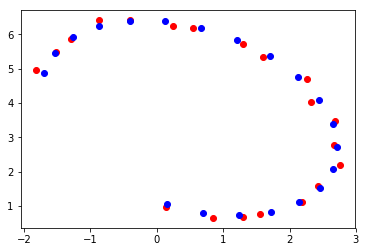

In [5]:
plt.plot(noisy_points[:,0], noisy_points[:,1], 'ro')
plt.plot(rot_points.T[:,0], rot_points.T[:,1], 'bo')
plt.show()

In [6]:
A = (np.vstack((noisy_points[:,0]**2, noisy_points[:,0]*noisy_points[:,1], noisy_points[:,1]**2, noisy_points[:,0], noisy_points[:,1]))).T

In [7]:
b = np.ones([number_of_points,1])
x = least_squares(A, b)

In [8]:
a_1 = x[0]
b_1 = x[1]
c_1 = x[2]
d_1 = x[3]
e_1 = x[4]

In [9]:
np.dot(A,x)

array([[0.96059958],
       [0.92447613],
       [0.97835761],
       [1.00802371],
       [1.00606581],
       [1.05964152],
       [0.94836546],
       [1.05061844],
       [0.94195669],
       [1.12332922],
       [0.87748446],
       [1.04749339],
       [0.98434304],
       [1.00258981],
       [1.05336833],
       [0.98692051],
       [0.91195913],
       [1.04513654],
       [1.06302616],
       [0.9547048 ]])

In [10]:
no_points_curve = 1000
x_range = linspace(-3, 3, no_points_curve)
y_range_1 = (-(e_1 + b_1*x_range) + np.sqrt((b_1**2 - 4*a_1*c_1)*x_range**2 + (2*e_1*b_1 - 4*c_1*d_1)*x_range + (e_1**2 + 4*c_1)))/(2*c_1)
y_range_2 = (-(e_1 + b_1*x_range) - np.sqrt((b_1**2 - 4*a_1*c_1)*x_range**2 + (2*e_1*b_1 - 4*c_1*d_1)*x_range + (e_1**2 + 4*c_1)))/(2*c_1)
x_range_no_nan = x_range[~isnan(y_range_1)]
y_range_1_no_nan = y_range_1[~isnan(y_range_1)]
y_range_2_no_nan = y_range_2[~isnan(y_range_1)]

/Users/gireeja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gireeja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


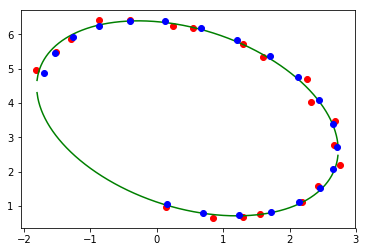

In [11]:
plt.plot(noisy_points[:,0], noisy_points[:,1], 'ro')
plt.plot(x_range_no_nan, y_range_1_no_nan, 'g')
plt.plot(x_range_no_nan, y_range_2_no_nan, 'g')
plt.plot(rot_points.T[:,0], rot_points.T[:,1], 'bo')
plt.show()

# Fitting polynomials

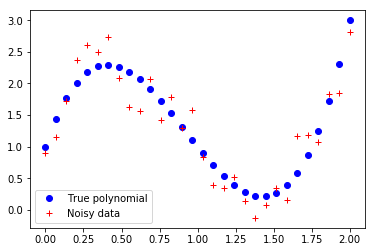

In [12]:
number_of_points = 30;
x = linspace(0,2,number_of_points)
#np.random.shuffle(x)

c = [1,7,-11,4]; # 4x^3 -11 x^2 +7 x + 1
true_y = polyval(x,c)


#c = [1,-3,3,-.75];

#true_y = sin(2*x)
y = true_y + np.random.normal(0,0.3,[number_of_points])

plt.plot(x,true_y,'bo')
plt.plot(x,y,'r+')

plt.legend(['True polynomial', 'Noisy data'])
plt.show()

Estimated coefficients [  1.05354669   6.76495586 -10.76133968   3.92046363]


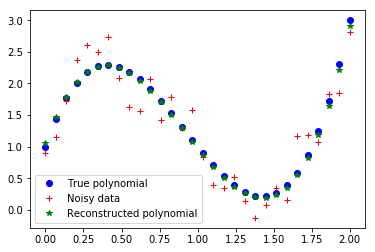

Train error: 2.698457826215875
True error 0.0441121712372342


In [13]:
A3 = (np.vstack((x**0,x**1,x**2,x**3))).T

est = least_squares(A3,y)
print('Estimated coefficients', est)

recon_t = polyval(x,est)
#true points
plt.plot(x,true_y,'bo')
#noisy points
plt.plot(x,y,'r+')
#reconstructed points
plt.plot(x,recon_t,'g*')
plt.legend(['True polynomial', 'Noisy data', 'Reconstructed polynomial'])
plt.show()
print('Train error:', sum((y - recon_t)**2))
print('True error', sum((true_y - recon_t)**2))

In [14]:
def makeA(d,x):
    return (np.vstack([x**i for i in range(d+1)])).T

Estimated coefficients: [ 9.34291813e-01 -9.72070831e+00  2.38745211e+02 -1.24129158e+03
  3.07096531e+03 -4.35357984e+03  3.79980953e+03 -2.09044795e+03
  7.12641866e+02 -1.38871075e+02  1.19442944e+01]


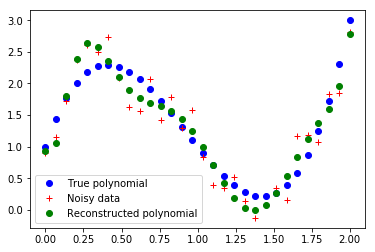

Train error: 1.3311185351626473
True error: 1.4116042581871908


In [15]:
Aprime = makeA(10,x)

est = least_squares(Aprime,y)
print('Estimated coefficients:', est)

recon_t = polyval(x,est)
plt.plot(x,true_y,'bo')
plt.plot(x,y,'r+')
plt.plot(x,recon_t,'go')
plt.legend(['True polynomial', 'Noisy data', 'Reconstructed polynomial'])
plt.show()
print('Train error:', sum((y - recon_t)**2))
print('True error:', sum((true_y - recon_t)**2))

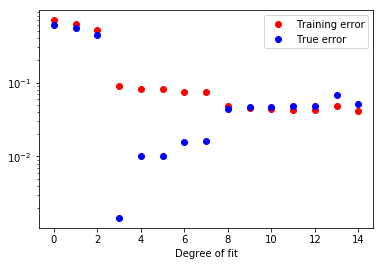

In [16]:
train_error = [np.average((y - polyval(x,least_squares(makeA(i,x),y)))**2) for i in range(15)]
true_error_on_points = [np.average((true_y - polyval(x,least_squares(makeA(i,x),y)))**2) for i in range(15)]
plt.plot(train_error,'ro')
plt.plot(true_error_on_points,'bo')
plt.legend(['Training error', 'True error'])
plt.xlabel('Degree of fit')
plt.yscale('log')
plt.show()

## What if we get bigger x 

Let's try the same thing, except let's move the x over further. Between 100 and 102. 

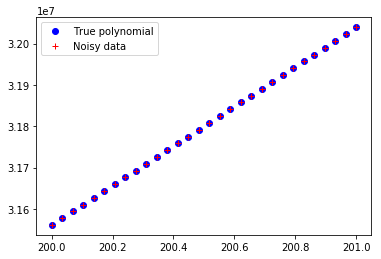

In [17]:
number_of_points = 30;
x = linspace(200,201,number_of_points)
#c = [1,-3,3,-.75];
c = [1,7,-11,4];
true_y = polyval(x,c);
y = true_y + np.random.normal(0,.2,[number_of_points])

plt.plot(x,true_y,'bo')
plt.plot(x,y,'r+')
plt.legend(['True polynomial', 'Noisy data'])
plt.show()

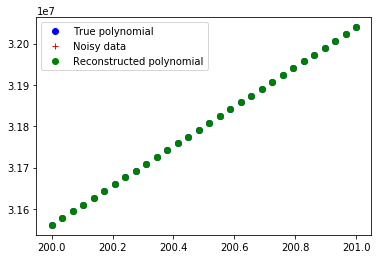

(30, 4)
(30,)
train error: 1.0061028848949072
true error: 0.19854414782526936
Estimated coef: [ 2.73846827e+07 -4.09772115e+05  2.03294869e+03  6.01649225e-01]


In [31]:
Aprime = makeA(3,x)
est = least_squares(Aprime,y)
recon_t = polyval(x,est)
plt.plot(x,true_y,'bo')
plt.plot(x,y,'r+')
plt.plot(x,recon_t,'go')
plt.legend(['True polynomial', 'Noisy data', 'Reconstructed polynomial'])
plt.show()
print(Aprime.shape)
print(y.shape)
print("train error:", sum((y - recon_t)**2))
print("true error:",sum((true_y - recon_t)**2))
print('Estimated coef:', est)

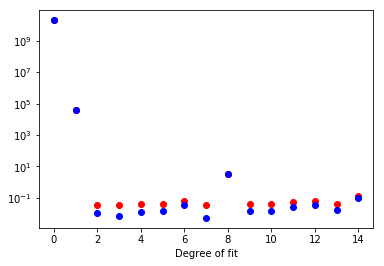

train error: [20353475050.351295, 36283.99065456034, 0.03568923528817138, 0.03353676282983024, 0.04149512387154169, 0.039402724507278934, 0.06119564309408286, 0.03314517463559398, 3.321980306165038, 0.0411476034779059, 0.040358885055155364, 0.049637924477603255, 0.061413860126542354, 0.042248955459492386, 0.12682264628440607]
true error: [20353465440.9358, 36292.28731827264, 0.010265100128834435, 0.006618138260842312, 0.012852397192103458, 0.013357639988467084, 0.031820419361225524, 0.005133429961282165, 3.273415080318211, 0.015127976690144275, 0.014296194139068236, 0.0239907158459615, 0.03617302409812825, 0.016280233155454602, 0.09602136306949612]


In [19]:
train_error = [np.average((y - polyval(x,least_squares(makeA(i,x),y)))**2) for i in range(15)]
true_error_on_points = [np.average((true_y - polyval(x,least_squares(makeA(i,x),y)))**2) for i in range(15)]
plt.plot(train_error,'ro')
plt.plot(true_error_on_points,'bo')
plt.yscale('log')
plt.xlabel('Degree of fit')
plt.show()
print("train error:", train_error)
print("true error:",true_error_on_points)

In [20]:
U, s, V = svd(Aprime)
s

array([4.41485432e+07, 3.27774825e+02, 2.17306700e-03, 1.41048988e-08])

In [21]:
cn = s[0]/s[-1]
print('Condition number', cn)

Condition number 3130014894877123.5


We need to add a penalty against huge values coming from these small singular values. 

In [22]:
## The big hack

def least_squares_r(A, b, llambda):
    return np.linalg.solve(A.T.dot(A) + llambda * np.identity(A.shape[1]), A.T.dot(b))

In [23]:
lambda1 = 5
lsr = least_squares_r(Aprime,y,lambda1)
lsr

array([-8.17454896e-04, -1.09196946e-01, -1.09290646e+01,  3.99982317e+00])

In [24]:
U, s, V = svd(A.T.dot(A) +  lambda1*np.identity(A.shape[1]))
s           

array([1.24101134e+04, 9.62368503e+02, 1.62476230e+02, 8.80813817e+00,
       6.29868221e+00])

In [25]:
cn = s[0]/s[-1]
print('Condition number', cn)

Condition number 1970.2714030797936


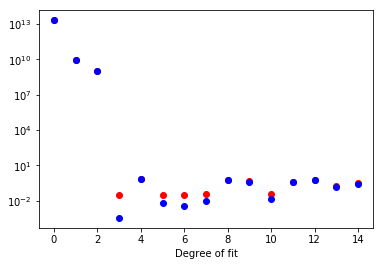

train error: [20657924716523.777, 9087463518.824606, 978133744.4641464, 0.03060991880240267, 0.7678702955082376, 0.03134238060653341, 0.03041279587552839, 0.03789140642862141, 0.5695494904033584, 0.45759553702411254, 0.03948006576889798, 0.4142568982794296, 0.6211695307695227, 0.16716372965142054, 0.31014930810390345]
true error: [20657924875748.363, 9087457100.264437, 978131637.2066163, 0.0003581447831980245, 0.7027118132882267, 0.005994099657990657, 0.00334236821267106, 0.009855130390417579, 0.5332975379069889, 0.4226382001898973, 0.013158532181284934, 0.37990124741459597, 0.5851009796593548, 0.14411257438757144, 0.2768482986088348]


In [26]:
train_error = [np.average((y - polyval(x,least_squares_r(makeA(i,x),y, 5)))**2) for i in range(15)]
true_error_on_points = [np.average((true_y - polyval(x,least_squares_r(makeA(i,x),y, 5)))**2) for i in range(15)]
plt.plot(train_error,'ro')
plt.plot(true_error_on_points,'bo')
plt.yscale('log')
plt.xlabel('Degree of fit')
plt.show()
print("train error:", train_error)
print("true error:",true_error_on_points)

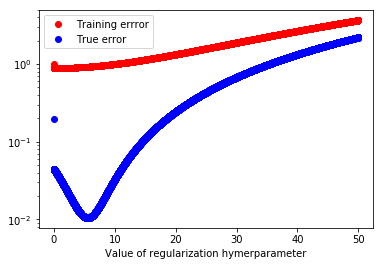

In [27]:
#l = linspace(0.0001,5000,100)
l = linspace(0,50,10000)
#train_error = [sum((y - polyval(x,least_squares_r(makeA(3,x),y,i*0.1)))**2) for i in l]
#true_error = [sum((true_y - polyval(x,least_squares_r(makeA(3,x),y,i*0.1)))**2) for i in l]

train_error = [sum((y - polyval(x,least_squares_r(makeA(3,x),y,i)))**2) for i in l]
true_error = [sum((true_y - polyval(x,least_squares_r(makeA(3,x),y,i)))**2) for i in l]

plt.plot(l,train_error,'ro')
plt.plot(l,true_error,'bo')
plt.legend(['Training errror', 'True error'])
plt.yscale('log')
plt.xlabel('Value of regularization hymerparameter')
plt.show()


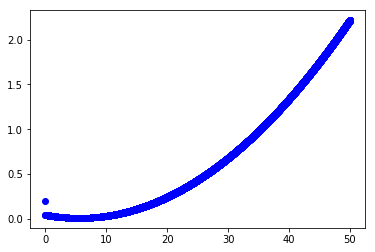

In [28]:
plt.plot(l,true_error,'bo')
plt.show()

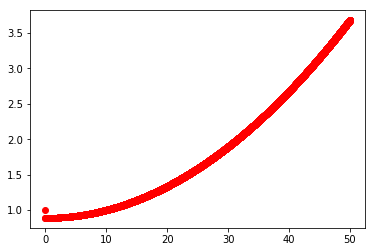

In [29]:
plt.plot(l,train_error,'ro')
plt.show()